In [1]:
import os

import numpy as np
import pandas as pd
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import lib.exp4 as exp4
from lib.reconstruction.config import colors, set_library_options
import lib.reconstruction.errors as errs
import lib.reconstruction.features as ftrs
import lib.reconstruction.neighbors as nbrs
from lib.reconstruction.permutation_tests import PermutationTestBetween, PermutationTestWithin

import lib.utility_functions as uf
import lib.util.datatype_utilities as dtutils

# Config
set_library_options()

% matplotlib inline

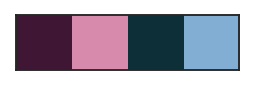

In [2]:
sns.palplot(colors.values())

In [3]:
tidy = pd.read_csv('./tidy_data.csv', index_col=0)
tidy['Condition'] = tidy['Condition'].map(lambda x: 'Untrained' if x == 'Naive' else x)
tidy['Position ID'] = tidy['Position ID'].map(int)

vals = ['Black Position', 'White Position', 'Is Real', 'Num Pieces']

board_set = tidy.pivot_table(index='Position ID', values=vals, aggfunc=lambda x: x.unique()[0])[vals]

In [8]:
tidy['Total Error Rate'] = tidy['Total Errors'] / 36
tidy['Type I Rate'] = tidy['Type I Errors'] / (36 - tidy['Num Pieces'])
tidy['Type II Rate'] = tidy['Type II Errors'] / tidy['Num Pieces']
tidy['Type III Rate'] = tidy['Type III Errors'] / tidy['Num Pieces']

/Users/gianni/anaconda/lib/python3.5/site-packages/matplotlib/legend.py:651: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


Real positions p: 0.339 val: -0.014741715399610111
Fake positions p: 0.406 val: -0.014985380116959074


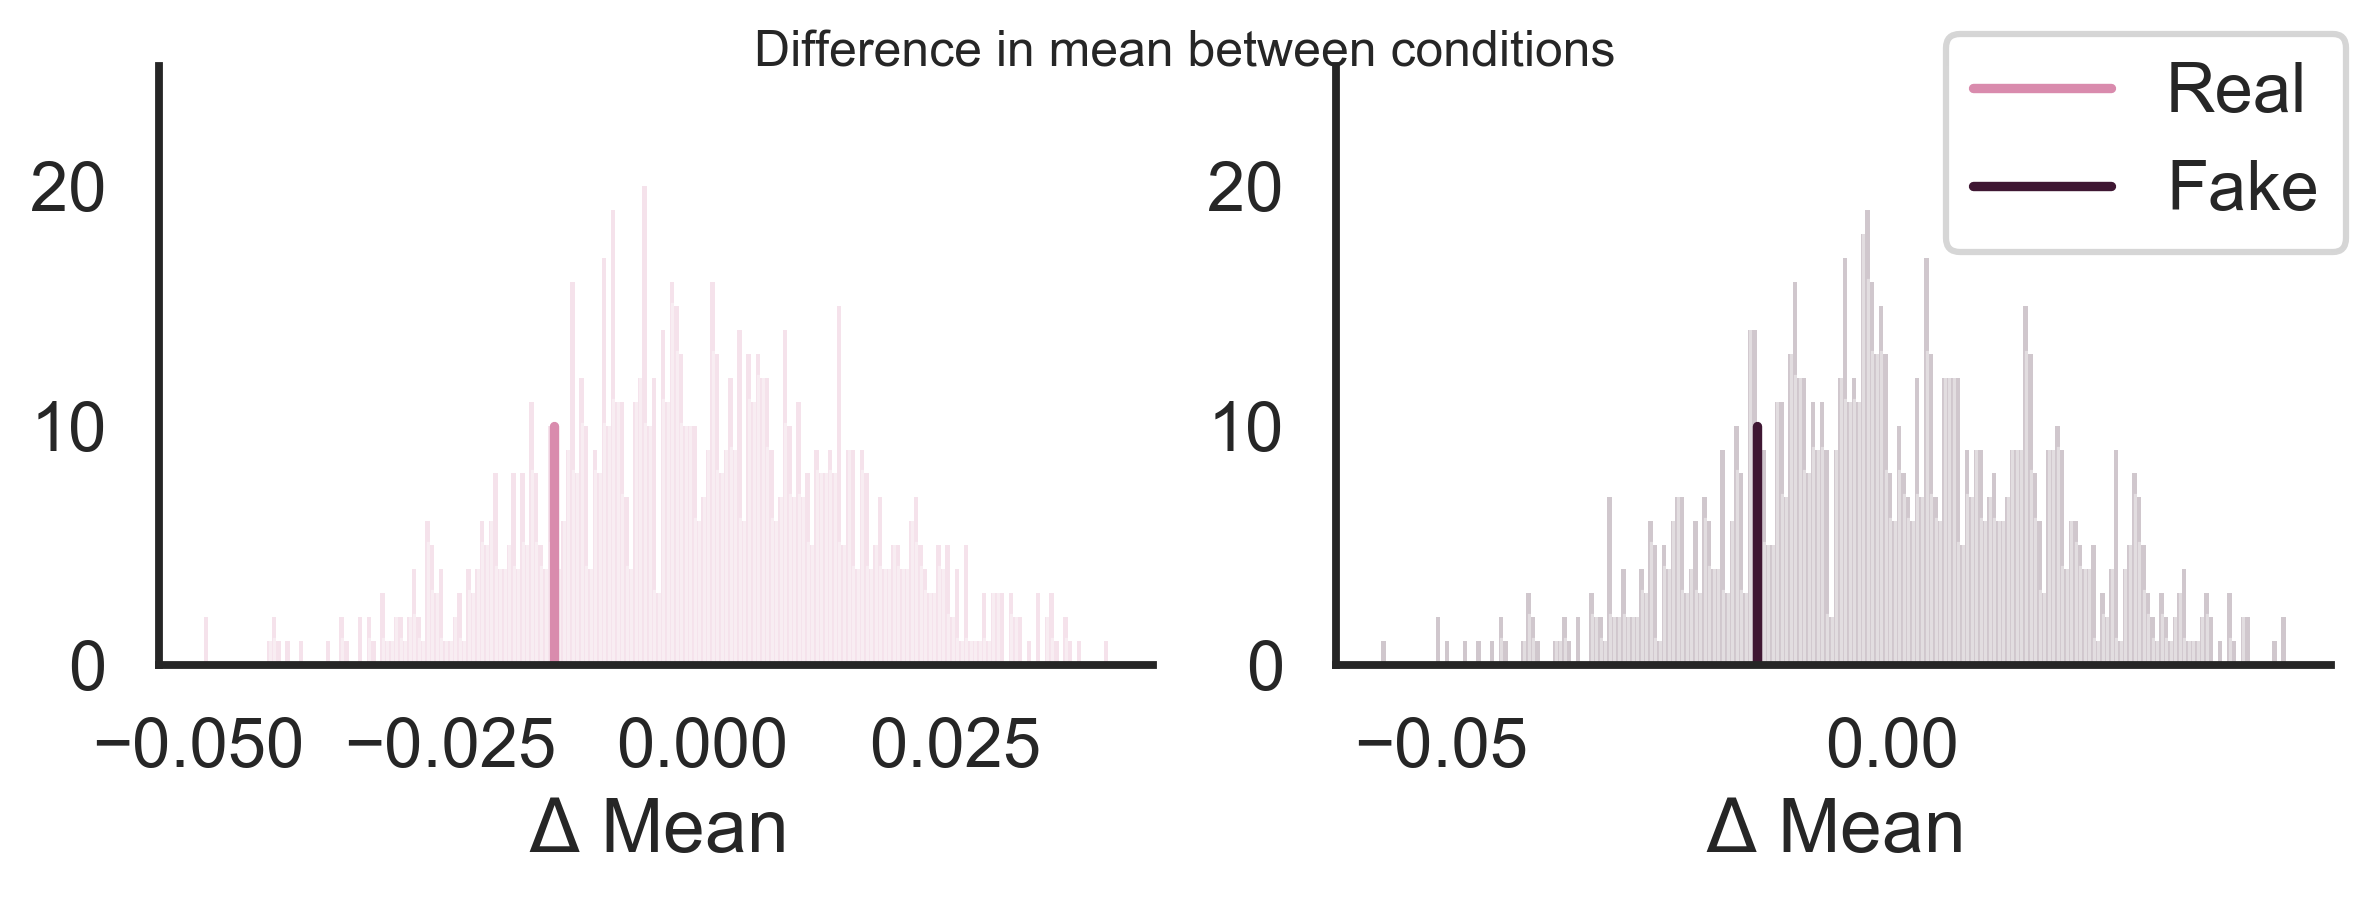

In [9]:
between_permutation_test = PermutationTestBetween(tidy, )
    
samples, axes = between_permutation_test('Total Error Rate')

In [ ]:
within_permutation_test = PermutationTestWithin(tidy, num_resamples=1000)

samples, axes = within_permutation_test('Total Error Rate')